# ANEO Puzzle

**Reference:** https://www.codingame.com/training/medium/aneo

## Puzzle statement

You enter a section of road and you plan to rest entirely on your cruise control to cross the area without having to stop or slow down.

The goal is to find the maximum speed (off speeding) that will allow you to cross all the traffic lights to green.

**Warning:** You can not cross a traffic light the second it turns red!

Your vehicle enters the zone directly at the speed programmed on the cruise control which ensures that it does not change anymore.

### Inputs

 - Line 1: An `integer` `speed` for the **maximum speed** allowed on the portion of the road (in `km/h`).
 - Line 2: An `integer` `lightCount` for the **number of traffic lights** on the road.
 - `lightCount` next lines:
 
   - An `integer` `distance` representing the **distance of the traffic light from the starting point** (in `m`).
   - An `integer` `duration` representing the **duration of the traffic light on each color** (in `s`).

A traffic light alternates a period of `duration` seconds in green and then duration seconds in red.
All traffic lights turn green at the same time as you enter the area.

### Output

 - Line 1: The `integer speed` (`km/h`) as high as possible that cross all the green lights without committing speeding.

### I/O Sample

#### Input

```
90
3
300 10
1500 10
3000 10
```

#### Output

```
54
```

### Initial Code

Here is the default code provided by the interface:

```python
import sys
import math

# Auto-generated code below aims at helping you parse
# the standard input according to the problem statement.

speed = int(input())
light_count = int(input())
for i in range(light_count):
    distance, duration = [int(j) for j in input().split()]

# Write an action using print
# To debug: print("Debug messages...", file=sys.stderr)

print("answer")
```

### Input Formating

We slighlty modify it to fit our future function interface:

```python
speed = int(input())
light_count = int(input())
positions = []
durations = []
for i in range(light_count):
    x, t = [int(j) for j in input().split()]
    positions.append(x)
    durations.append(t)
```

## Solution

### Observations

First we draw some observations that are matter of interest:

 - There is a need of units conversion between `km/h` and `m/s`;
 - There is a need of exact computation: `float` or finite precision arithemtic should be avoided, we use Integral Numbers instead;
 - Brute force works for Integral solutions (few cases), the problem is totally different if real values are allowed for $v$;
 - There are setups with no solution, when it is impossible to cross all Trafic Lights at constant speed;
 - Global Period of the problem is $T = \mathrm{lcm}\left\{2t_1,\dots,2t_n\right\}$, anyway this is not required to find the solution.

### The Green Wave Criterion

Let $n$ Traffic Lights located at ${x_1,\dots,x_n}$ with durations ${t_1,\dots,t_n}$ such as $\mathcal{T} \equiv \left\{(x_i, t_i) \,|\, \forall i \in \{1,\dots, n\} \,, x_i, t_i \in \mathbb{N} \right\}$.

For each Traffic Light $\mathcal{T}_i$ , for a given speed $0 < v \leq v_\max$ where $v \in \mathbb{N}$ (note the problem must be carefully scaled to ensure units consistency), we can assess the required time $\tau_i$ to reach the position $x_i$:

$$
\tau_i = \frac{x_i}{v} \,,\quad \forall i \in \{1,\dots, n\}
$$

We compare $\tau_i$ before Trafic Light duration $t_i$ and we notice the ratio $r_i$ must lie within:

$$
\exists k_i \in \mathbb{N} \,,\quad r_i = \frac{\tau_i}{t_i} \in \left[2k_i, 2k_i+1\right[ \,,\quad \forall i \in \{1,\dots, n\}
$$

To cross it when it is in <span style="color: green;">Green state</span>. We define the quantity $p_i$ as the integral part of $r_i$:

$$
p_i(v) = \left\lfloor\frac{x_i}{v\cdot t_i}\right\rfloor \,,\quad \forall i \in \{1,\dots, n\}
$$


And we observe that the above criterion is equivalent to ensure $p_i$ is an even number. It writes:

$$
\exists k_i \in \mathbb{N} \,,\quad q_i(v) \equiv p_i(v) = 2k_i \equiv 0 \pmod{2} \,,\quad \forall i \in \{1,\dots, n\}
$$

Thus, we have a simple criterion to check, at constant speed $v$, the car can cross the Traffic Light $\mathcal{T}_i$.

Finally, we must check the criterion is validated for all Traffic Light $\mathcal{T}_i$ for a given speed $v$. The global criterion $c$ is then:

$$
c(v) = \bigwedge\limits_{i=1}^{n} q_i(v)
$$

This validates the obervation: "Integral Arithemtic (in Computer Science sense) is sufficient to solve the problem". 

We have shown the problem statement is equivalent to:

$$
\underset{0 < v \leq v_\max}{\arg\max}\, v\,|\,c(v) \equiv \top
$$

Which can be brute forced for plausible and realisable integral values of $v$.

Now we have to translate it into pseudo-code and actually code it with a language.

### Algorithm

#### Pseudo-code

The algorithm implementation decomposes as follow:

 1. Iterate (`for`) all possible integral speeds $0 < v \leq v_\max$ in decreasing order (brute force):
 
   1. Iterate (`for`) through all Traffic Lights $\mathcal{T}_i$ (exhaustivity):
   
     1. Compute $p_i$ as the [floor division][1] (`//`) of $3600 \cdot x_i$ by $1000 \cdot v\cdot t_i$ (including units scaling);
     1. Compute $q_i$ as $p_i$ [modulo][2] (`%`) $2$ (green light test);
     
   1. `return` the first $v$ where all $q_i$ (`&=`) divide evenly;
 
 1. `return` $\emptyset$ (`None`) otherwise (implicit).

[1]: https://docs.python.org/3/library/operator.html?highlight=div#operator.floordiv
[2]: https://docs.python.org/3/library/operator.html?highlight=div#operator.mod

#### Implementation

We chose Python for the implementation. There is no need for extra library even `math` is not required since the floor division operator is already available. Anyway we added some assertions to properly setup the function interface.

In [1]:
import numbers
import collections

In [2]:
def getMaxSpeed(positions, durations, constraint):
    # Assertions:
    assert isinstance(constraint, numbers.Integral) and (constraint > 0)
    assert isinstance(positions, collections.Iterable)
    assert all([isinstance(x, numbers.Integral) for x in positions])
    assert all([x >= 0 for x in positions])
    assert isinstance(durations, collections.Iterable)
    assert all([isinstance(t, numbers.Integral) for t in durations])
    assert all([t > 0 for t in durations])
    assert len(positions) > 0
    assert len(positions) == len(durations)
    # Algorithm:
    for v in range(constraint, 0, -1):
        c = True
        for x, t in zip(positions, durations):
            p = x*3600 // (v*t*1000)
            q = (p % 2 == 0)
            c &= q
        if c:
            return v

## Test Cases

We have stored ANEO test cases into a JSON to feed this notebook, an entry looks like:

In [3]:
import json
with open('./data/ANEO.json', 'r') as fh:
    data = json.load(fh)
data[4]

{'title': 'Unsettled country road',
 'constraint': 90,
 'positions': [300, 1500, 3000],
 'durations': [30, 20, 10],
 'solution': 67}

### Finite precision Arithmetic

Test cases provided are deliberatly tailored to make finite precision arithemtic fails such as `float` or `decimal.Decimal`. Let's try a simple example with test case 8 "Rain of Traffic Lights" where `Decimal` fails:

In [4]:
print(data[7])

{'title': 'Rain of Traffic Lights', 'constraint': 130, 'positions': [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000, 8500, 9000, 9500, 10000, 10500, 11000, 11500, 12000, 12500, 13000, 13500, 14000, 14500, 15000, 15500, 16000, 16500, 17000, 17500, 18000, 18500, 19000, 19500, 20000, 20500, 21000, 21500, 22000, 22500, 23000, 23500, 24000, 24500, 25000, 25500, 26000, 26500, 27000, 27500, 28000, 28500, 29000, 29500, 30000, 30500, 31000, 31500, 32000, 32500, 33000, 33500, 34000, 34500, 35000, 35500, 36000, 36500, 37000, 37500, 38000, 38500, 39000, 39500, 40000, 40500, 41000, 41500, 42000, 42500, 43000, 43500, 44000, 44500, 45000, 45500, 46000, 46500, 47000, 47500, 48000, 48500, 49000, 49500, 50000], 'durations': [15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 

In [5]:
import math
import decimal
import fractions

In [6]:
x = 6500
t = 60

Using Decimal Finite Precision system returns:

In [7]:
tau = decimal.Decimal(x)/decimal.Decimal(t)*decimal.Decimal('3.6')
tau

Decimal('389.9999999999999999999999999')

Instead of:

In [8]:
tauf = fractions.Fraction(x * 3600, t * 1000)
tauf

Fraction(390, 1)

This will fail to check because of finite precision arithmetic limitation:

In [9]:
p = math.floor(tau)
p

389

In [10]:
q = (p % 2 == 0)
q

False

It could be tempting to use `round` instead of `floor` to get the correct result but this is a **design flaw** as it could return false positive.

The following example will return a false positive if `round` is used:

In [11]:
tau = fractions.Fraction((x-1)*3600, t*1000)
tau

Fraction(19497, 50)

In [12]:
float(tau)

389.94

In [13]:
math.floor(tau)

389

In [14]:
round(tau)

390

### Validation

Let's challenge the above defined function with the ANEO trial test cases:

In [15]:
n = len(data)
for i in range(n):
    # Solve the given problem:
    data[i]['result'] = getMaxSpeed(data[i]['positions'], data[i]['durations'], data[i]['constraint'])
    # Metadata:
    data[i]['valid'] = (data[i]['result'] == data[i]['solution'])
    data[i]['fullspeed'] = (data[i]['result'] == data[i]['constraint'])
    data[i]['count'] = len(data[i]['positions'])

The complete result looks like:

In [16]:
import pandas as pd
pd.DataFrame(data).loc[:,['title', 'constraint', 'solution', 'result', 'valid', 'fullspeed']]

,title,constraint,solution,result,valid,fullspeed
0,The village traffic light,50,50,50,True,True
1,The village traffic light 2,50,36,36,True,False
2,Quiet country road,90,90,90,True,True
3,Less quiet country road,90,54,54,True,False
4,Unsettled country road,90,67,67,True,False
5,Country road with no median strip,80,49,49,True,False
6,German Highway,200,60,60,True,False
7,Rain of Traffic Lights,130,60,60,True,False
8,Light string,130,6,6,True,False
9,Fast lights,90,74,74,True,False


## Conclusions

 > This puzzle is quite good example of an *apparently simple problem* statement that involves different skills and knowledges (mechanic, modular arithmetic, finite precision limitation, etc.).

The solution can be found by brute force because we stay in Integral domain. If we are led to solve it into Real domain, then there still have a lot of work to carry out. Anyway, for realisable values of integral speed the *worst case solution* can be found in $\mathcal{O}(n\cdot v_\max)$ &ndash; which is somehow acceptable &ndash; because we have shown that it is possible to check the Traffic Light state in $\mathcal{O}(1)$.

## Bonus

For sake of completness, let's encapsulate all together in a `class`.

In [17]:
import functools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
class ANEO:
    
    def __init__(self, constraint, positions, durations, solution=None, title=None, **kwargs):
        """
        Initialize Traffic Lights Problem
        """
        
        # Problem Statement Assertions:
        assert isinstance(constraint, numbers.Integral) and (constraint > 0)
        assert isinstance(positions, collections.Iterable)
        assert all([isinstance(x, numbers.Integral) for x in positions])
        assert all([x >= 0 for x in positions])
        assert isinstance(durations, collections.Iterable)
        assert all([isinstance(t, numbers.Integral) for t in durations])
        assert all([t > 0 for t in durations])
        assert len(positions) > 0
        assert len(positions) == len(durations)
        assert (solution is None) or (isinstance(solution, numbers.Integral) and (solution <= constraint) and (solution > 0))
        assert (title is None) or isinstance(title, str)
        
        # Problem Initialization:
        self._constraint = constraint
        self._positions = positions
        self._durations = durations
        self._solution = solution
        self._title = title
    
    @staticmethod
    def lcm(a, b):
        """
        Least Common Multiple
        """
        assert isinstance(a, numbers.Integral)
        assert isinstance(b, numbers.Integral)
        return (a*b)//math.gcd(a, b)

    @staticmethod
    def mlcm(l):
        """
        Extended Least Common Multiple
        """
        assert isinstance(l, collections.Iterable)
        assert all([isinstance(x, numbers.Integral) for x in l])
        assert len(l) > 0
        if len(l) == 1:
            return l[0]
        else:
            return functools.reduce(ANEO.lcm, l)

    @property
    def vmax(self):
        return self._constraint
    
    @property
    def x(self):
        return self._positions
    
    @property
    def n(self):
        return len(self.x)
    
    @property
    def t(self):
        return self._durations
    
    @property
    def vsol(self):
        return self._solution
    
    @property
    def title(self):
        return self._title
    
    @property
    def period(self):
        """
        Traffic Lights Gobal Period [s]
        """
        return ANEO.mlcm(2*np.array(self.t))
        
    def __repr__(self):
        return "<ANEO '%s': vmax=%d[km/h], n=%d, x=%s[m], t=%s[s]>" % (self.title, self.vmax, self.n, self.x[:5], self.t[:5])
    
    def solve(self):
        """
        Solve the ANEO problem (Integral domain only) using brute force and O(1) check
        Return the highest Integral Speed that matches Traffic Light conditions if any.
        Return None otherwise.
        """
        for v in range(self.vmax, 0, -1):
            c = True
            for x, t in zip(self.x, self.t):
                p = x*3600 // (v*t*1000)
                q = (p % 2 == 0)
                c &= q
            if c:
                if self.vsol and (v != self.vsol):
                    raise ValueError("Algorithm have not converged to the known solution %d =! %d" % (v, self.vsol))
                return v
    
    def intervals(self, i=0, tmax=None):
        """
        Generate Time Intervals when Traffic Light is Green
        """
        assert isinstance(i, numbers.Integral) and (i >= 0) and (i < self.n)
        assert (tmax is None) or (isinstance(tmax, numbers.Number) and (tmax > 0))
        k = 0
        while True:
            I = np.array([2*k, 2*k+1])*self.t[i]
            k += 1
            if tmax and (I[0] > tmax):
                break
            yield I

    def plot(self, tmax=None):
        """
        Plot Mechanical Figure
        """
        assert (tmax is None) or (isinstance(tmax, numbers.Numbers) and (tmax > 0))
        
        vmax = self.vmax/3.6
        vsol = self.solve()/3.6
        if not tmax:
            tmax = 1.1*self.x[-1]/vsol
        T = self.period
        nc = math.ceil(tmax/T)
        t = np.linspace(0, tmax, 2)
        
        fig, axe = plt.subplots()
        
        axe.plot(t, vmax*t, '-.', color='red', label=r'$v_\max = %.2f$ $[\mathrm{m/s}]$' % vmax)
        axe.plot(t, self.vsol/3.6*t, color='green', label=r'$v_\mathrm{sol} = %.2f$ $[\mathrm{m/s}]$' % vsol)
        
        # Periods:
        for i in range(nc):
            axe.axvline((i+1)*T, linewidth=1, color='blue')
        
        # Traffic Lights:
        for i in range(self.n):
            axe.axhline(self.x[i], linewidth=1, color='orange', label=r'$x_{%d}=%d$ $[\mathrm{m}]$' % (i, self.x[i]))
            # Intervals:
            for j in self.intervals(i, tmax=nc*T):
                axe.plot(j, [self.x[i]]*2, linewidth=3, color='k')
        
        axe.set_xlim([0, 1.1*nc*T])
        axe.set_ylim([0, 1.1*np.max(self.x)])
        
        axe.set_title("Mechanical Plot: %s" % self.title)
        axe.set_xlabel(r"Time, $t$ $[\mathrm{s}]$")
        axe.set_ylabel(r"Coordinate, $x$ $[\mathrm{m}]$")
        axe.legend(bbox_to_anchor=(1,1), loc='upper left')
        axe.grid()
        
        return fig

We feed the class with a setup:

In [19]:
A = ANEO(**data[4])

We can assess quantities of interest:

In [20]:
A.solve()

67

In [21]:
A.period

120

And sketch a plot of the actual situation:

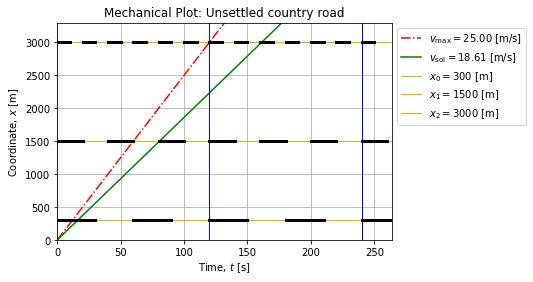

In [22]:
_ = A.plot()

And confirm it passes all test cases:

In [23]:
all([ANEO(**d).solve() == d['solution'] for d in data])

True